In [7]:
import os
import re
import sys
import pandas as pd
import random
import numpy as np


out_path_min = '/home/fuchen/Desktop/experiment/petl_out_1112_min.txt'
out_path_max = '/home/fuchen/Desktop/experiment/petl_out_1112_max.txt'
max_property_file = '/home/fuchen/Desktop/experiment/max.petl'
min_property_file = '/home/fuchen/Desktop/experiment/min.petl'

In [8]:
number_seeds = 10
seeds = []
for i in range(0, number_seeds):
    seeds.append(random.randint(0,1000000))
seeds

[666750, 31793, 611067, 588991, 279495, 599829, 409248, 901217, 488080, 680342]

In [9]:
def run(out_path, property_file):
    command = 'java -jar epmc-petl.jar check --property-solver propositional-explicit,operator-explicit,pctl-explicit-next,petl-explicit-knowledge,uct-until-uniform --prism-flatten false --model-input-type mas --property-input-type petl '
    model_file = "/home/fuchen/Desktop/experiment/navigation_4_5.prism"
    equiv_file = '/home/fuchen/Desktop/experiment/navigation.equiv'
    files = ' --model-input-files ' + model_file + ' ' + equiv_file + ' --property-input-files ' + property_file

    bvalues = [9]
    depths = [9]
    times = [60]
    
    interval = 1
    
    data = list()
    with open(out_path,'a') as fw:
        for seed in seeds:
            for depth in depths:
                for time in times:
                    for bvalue in bvalues:
                        row = dict()
                        row['bvalue'] = bvalue
                        row['depth_limit'] = depth
                        row['time_limit'] = time
                        row['seed'] = seed
                        params = '--uct-depth-limit ' + str(depth) + ' --uct-time-limit ' + str(time) + ' --bvalue '  + str(bvalue) + ' --print-time-interval ' + str(interval) + ' --random-seed ' + str(seed)
                        full_command = command + params + files
                        console_out = os.popen(full_command).read()
                        fw.write(console_out)
                        fw.write('\n')
                        fw.flush()
                        lines = console_out.split('\n')
                        for line in lines:
                            if line.startswith('Elapsed time'):
                                elapsed_time = int(re.findall(r"time: (.+?)s Current result:", line)[0])
                                result = re.findall(r"result: (.+?) rollouts:", line)[0]
                                rollout = re.findall(r"rollouts: (.+?) nodes:", line)[0]
                                node = line[line.index('nodes:') + 6 :].strip()
                                row[str(elapsed_time) + 's' + ' result'] = float(result)
                                row[str(elapsed_time) + 's' + ' rollouts'] = int(rollout)
                                row[str(elapsed_time) + 's' + ' nodes'] = int(node)
                            if line.startswith('Final result:'):
                                final_res = line[line.index(':')+1 :].strip()
                            if line.startswith('Number of rollouts:'):
                                final_rollout = line[line.index(':') + 1 :].strip()
                            if line.startswith('Number of nodes:'):
                                final_node = line[line.index(':') + 1 :].strip()
                        row[str(time) + 's' + ' result'] = float(final_res)
                        row[str(time) + 's' + ' rollouts'] = int(final_rollout)
                        row[str(time) + 's' + ' nodes'] = int(final_node)
                        data.append(row)
    return data

data_max = run(out_path_min, min_property_file)

In [10]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', None)
#pd.set_option('precision', 3)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_max = pd.DataFrame(data_max)
df_max.to_csv('/home/fuchen/Desktop/experiment/max_60s_min.csv')
df_max

,bvalue,depth_limit,time_limit,seed,1s result,1s rollouts,1s nodes,2s result,2s rollouts,2s nodes,3s result,3s rollouts,3s nodes,4s result,4s rollouts,4s nodes,5s result,5s rollouts,5s nodes,6s result,6s rollouts,6s nodes,7s result,7s rollouts,7s nodes,8s result,8s rollouts,8s nodes,9s result,9s rollouts,9s nodes,10s result,10s rollouts,10s nodes,11s result,11s rollouts,11s nodes,12s result,12s rollouts,12s nodes,13s result,13s rollouts,13s nodes,14s result,14s rollouts,14s nodes,15s result,15s rollouts,15s nodes,16s result,16s rollouts,16s nodes,17s result,17s rollouts,17s nodes,18s result,18s rollouts,18s nodes,19s result,19s rollouts,19s nodes,20s result,20s rollouts,20s nodes,21s result,21s rollouts,21s nodes,22s result,22s rollouts,22s nodes,23s result,23s rollouts,23s nodes,24s result,24s rollouts,24s nodes,25s result,25s rollouts,25s nodes,26s result,26s rollouts,26s nodes,27s result,27s rollouts,27s nodes,28s result,28s rollouts,28s nodes,29s result,29s rollouts,29s nodes,30s result,30s rollouts,30s nodes,31s result,31s rollouts,31s nodes,32s result,32s rollouts,32s nodes,33s result,33s rollouts,33s nodes,34s result,34s rollouts,34s nodes,35s result,35s rollouts,35s nodes,36s result,36s rollouts,36s nodes,37s result,37s rollouts,37s nodes,38s result,38s rollouts,38s nodes,39s result,39s rollouts,39s nodes,40s result,40s rollouts,40s nodes,41s result,41s rollouts,41s nodes,42s result,42s rollouts,42s nodes,43s result,43s rollouts,43s nodes,44s result,44s rollouts,44s nodes,45s result,45s rollouts,45s nodes,46s result,46s rollouts,46s nodes,47s result,47s rollouts,47s nodes,48s result,48s rollouts,48s nodes,49s result,49s rollouts,49s nodes,50s result,50s rollouts,50s nodes,51s result,51s rollouts,51s nodes,52s result,52s rollouts,52s nodes,53s result,53s rollouts,53s nodes,54s result,54s rollouts,54s nodes,55s result,55s rollouts,55s nodes,56s result,56s rollouts,56s nodes,57s result,57s rollouts,57s nodes,58s result,58s rollouts,58s nodes,59s result,59s rollouts,59s nodes,60s result,60s rollouts,60s nodes
0,9,9,60,666750,0.000194,1792,1975391,0.000049,3920,3900614,0.000049,6199,5727628,0.000022,8144,7152997,0.000022,10357,8697449,0.000022,12235,10038708,0.000003,14439,11545116,0.000003,16345,12703922,0.000003,18114,13793023,0.000003,20392,15097007,0.000003,22381,16199734,0.000003,24216,17235389,0.000003,26291,18424631,0.000003,28219,19503584,0.000003,30093,20464948,0.000003,32023,21447883,0.000003,34031,22459075,0.000003,35855,23389331,0.000003,37618,24176679,0.000003,39418,25043194,0.000003,39866,25267616,0.000003,39867,25268380,0.000003,41298,25905251,0.000003,41596,26043742,0.000003,41597,26043742,0.000003,41968,26233233,0.000003,41969,26233233,0.000003,42290,26370405,0.000003,42291,26370405,0.000003,42566,26496618,0.000003,42567,26497448,0.000003,42803,26587953,0.000003,42804,26588693,0.000003,43011,26690288,0.000003,43012,26690468,0.000003,43195,26758620,0.000003,43196,26759032,0.000003,43348,26836246,0.000003,43349,26836246,0.000003,43490,26892070,0.000003,43491,26894182,0.000003,43596,26948490,0.000003,43597,26948490,0.000003,43691,26988723,0.000003,43692,26989368,0.000003,43773,27024810,0.000003,43774,27025386,0.000003,43852,27051047,0.000003,43853,27051419,0.000003,43909,27081241,0.000003,43910,27082392,0.000003,43954,27114254,0.000003,43955,27114254,0.000003,43996,27132317,0.000003,43997,27132465,0.000003,44040,27147808,0.000003,44041,27147856,0.000003,44070,27158954,0.000003,44071.000000,27158954.000000,0.000003,44100,27169152
1,9,9,60,31793,0.000440,1239,1432609,0.000440,2811,2953135,0.000440,4249,4211708,0.000424,6198,5755668,0.000082,7428,6656322,0.000082,9185,7920557,0.000082,10461,8804559,0.000082,12285,10085691,0.000070,13855,11121681,0.000070,15095,11922623,0.000070,16857,13021445,0.000039,18468,14015734,0.000039,19692,14718261,0.000009,21039,15492375,0.000009,22981,16520378,0.000009,24581,17406275,0.000009,26000,18189603,0.000009,27356,18910788,0.000009,28892,19757184,0.000009,30735,20668124,0.000009

In [11]:
col_mean = df_max.mean()

pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.DataFrame(col_mean)

,0
bvalue,9.000000
depth_limit,9.000000
time_limit,60.000000
seed,525681.200000
1s result,0.002637
1s rollouts,1382.100000
1s nodes,1564261.900000
2s result,0.000350
2s rollouts,3016.800000
2s nodes,3107709.100000


In [9]:
csvpath = '/home/fuchen/Desktop/experiment/backup/max/max_60s_dell_65.csv'
df = pd.read_csv(csvpath,index_col=[0])
df

,bvalue,depth_limit,time_limit,seed,1s result,1s rollouts,1s nodes,2s result,2s rollouts,2s nodes,...,57s nodes,58s result,58s rollouts,58s nodes,59s result,59s rollouts,59s nodes,60s result,60s rollouts,60s nodes
0,9,9,60,456581,0.268786,1543,1812963,0.868898,3491,2942665,...,25499612,0.909199,83743,25697545,0.909199,83744,25698031,0.909199,83958,25870673
1,9,9,60,376669,0.868898,1212,1484749,0.868898,2596,2835328,...,23373463,0.909199,70049,23445199,0.909199,71168,23605154,0.909199,72349,23682607
2,9,9,60,177920,0.868898,1199,1410787,0.868898,2486,2847832,...,26460500,0.982812,45018,26491618,0.982812,45019,26493226,0.982812,45061,26519817
3,9,9,60,13812,0.511968,1055,1304196,0.511968,2326,2346888,...,25839770,0.909199,63091,25839770,0.909199,63373,25886754,0.909199,63420,25896132
4,9,9,60,405222,0.868898,1014,1354892,0.868898,2158,2495081,...,21566124,0.982812,66075,21683139,0.982812,67212,21787426,0.982812,68276,21894875
5,9,9,60,547322,0.053470,1129,1320121,0.191804,2828,2555396,...,16766381,0.878027,107291,16799919,0.878027,109330,16840109,0.878027,111296,16878540
6,9,9,60,241215,0.069633,1567,1558399,0.115165,3322,3054852,...,26341662,0.909199,48211,26361482,0.909199,48212,26361482,0.909199,48325,26398454
7,9,9,60,794653,0.868898,1100,1409805,0.868898,2280,2590522,...,21797845,0.982812,73245,21908222,0.982812,74387,22005728,0.982812,75558,22112545
8,9,9,60,663448,0.191804,1287,1445460,0.868898,2470,2574615,...,25352597,0.982812,58127,25426191,0.982812,58128,25426191,0.982812,58167,25431817
9,9,9,60,479512,0.000976,1153,1417671,0.638648,2936,2932436,...,24599893,0.909199,74906,24684616,0.909199,75838,25456632,0.909199,75860,25477282


In [24]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', None)

col_mean = df.mean(axis=0)



#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#df_mean = pd.DataFrame(col_mean)
#col_mean.to_frame()

0.4572227465

In [57]:
names = list()
values = list()
values2 = list()
for i in range(0,60):
    names.append(str(i+1))
    key = str(i+1) + 's result'
    values.append(float('%.3f' % col_mean[key]))
    values2.append(float(0.983))

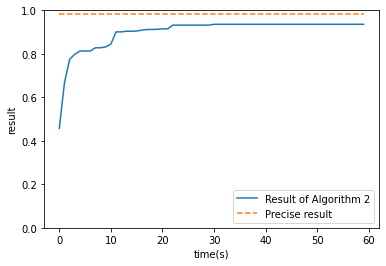

In [62]:
import matplotlib.pyplot as plt
from pylab import * 
#mpl.rcParams['font.sans-serif'] = ['SimHei']

x = range(len(values))
plt.plot(x, values, label='Result of Algorithm 2')
plt.plot(x, values2, linestyle="--",label='Precise result')
plt.legend(loc=4)
plt.ylim(0, 1.0)
#plt.margins(0)
plt.xlabel("time(s)")
plt.ylabel("result")
#plt.title("Pmax")
plt.savefig('max_appro.pdf',dpi=200, bbox_inches='tight')
plt.show()
plt.close()

In [52]:
values2

[0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983]